In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
url = 'C:\\Anaconda\\aaa\\echocardiogram.data'
data = pd.read_csv(url, sep = ',', na_values = '?', engine = 'python')

In [3]:
data = data.fillna(data.median(axis = 0), axis = 0)
data.columns = ['C' + str(i) for i in range(1, 14)]

In [10]:
X = data.drop(('C13'), axis = 1) 
X = data.drop(('C11'), axis = 1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y.unique())
y_tr = le.transform(y)
print(X.shape)
print(y.shape)

(131, 12)
(131,)


Principal Components Analysis (PCA)

Метод главных компонент используется уменьшения числа размерности исходных данных. Рассмотрим его применение к нашим данным. Изначально имеем 12 столбцов - число критериев, равное начальной размерности данных. Попробуем уменьшить размерность до 8

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
pca.fit(X)
pca_x = pca.transform(X)
pca_x.shape

(131, 8)

Разбиваем данные на тестовую и обучающую выборки

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_tr, test_size = 0.33, random_state = 7)

Используем классификатор Gradient Boosted Trees с 30-ю деревьями

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

GBT = GradientBoostingClassifier(n_estimators=30)
GBT.fit(X_train, y_train)
    
y_train_pred = GBT.predict(X_train)
y_test_pred = GBT.predict(X_test)
     
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0


In [16]:
c_arr = np.arange(2,12,1)

In [17]:
test_err_GBT = []
train_err_GBT = []

for c in c_arr:
    pca = PCA(n_components = c)
    pca.fit(X)
    X_pca = pca.transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_tr, test_size = 0.33, random_state = 7)
    
    GBT = GradientBoostingClassifier(n_estimators=30)
    GBT.fit(X_train, y_train)
    
    y_train_pred = GBT.predict(X_train)
    y_test_pred = GBT.predict(X_test)
    
    train_err_GBT.append(np.mean(y_train != y_train_pred))
    test_err_GBT.append(np.mean(y_test != y_test_pred))

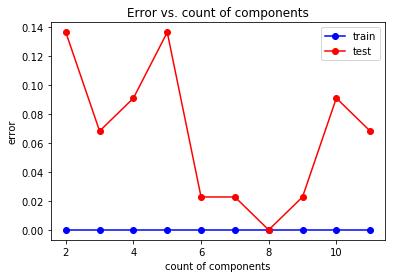

In [19]:
plt.plot(c_arr, train_err_GBT, 'b-o', label = 'train')
plt.plot(c_arr, test_err_GBT, 'r-o', label = 'test')

plt.title('Error vs. count of components')
plt.xlabel('count of components')
plt.ylabel('error')
plt.legend()
pass

Из графика видно, что при количестве компонент = 8 имеем нулевую ошибку на обучающей и тестовой выборках.

Минимальные значения ошибок на обучающей и тестовой выборке

In [20]:
min_train_err = np.min(train_err_GBT)
min_test_err_GBT = np.min(test_err_GBT)
print(min_train_err, min_test_err_GBT)

0.0 0.0


Наилучшее число используемых компонент:

In [21]:
print(c_arr[test_err_GBT == min_test_err_GBT])

[8]


Исследуем зависимость ошибки от числа используемых компонент с использованием классификатора AdaBoost с 20-ю деревьями

In [22]:
from sklearn.ensemble import AdaBoostClassifier

test_err_AB = []
train_err_AB = []
oob_err_AB = []

for c in c_arr:
    pca = PCA(n_components = c)
    pca.fit(X)
    X_pca = pca.transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_tr, test_size = 0.33, random_state = 7)
    
    AB = AdaBoostClassifier(n_estimators = 20)
    AB.fit(X_train, y_train)
    
    y_train_pred = AB.predict(X_train)
    y_test_pred = AB.predict(X_test)
    
    train_err_AB.append(np.mean(y_train != y_train_pred))
    test_err_AB.append(np.mean(y_test != y_test_pred))

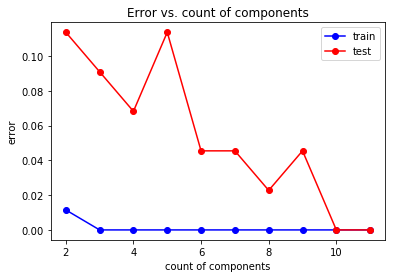

In [24]:
plt.plot(c_arr, train_err_AB, 'b-o', label = 'train')
plt.plot(c_arr, test_err_AB, 'r-o', label = 'test')
plt.title('Error vs. count of components')
plt.xlabel('count of components')
plt.ylabel('error')
plt.legend()
pass

Из графика видно, что при количестве компонент = 10 и 11 имеем нулевую ошибку на обучающей и тестовой выборках.

In [26]:
min_train_err = np.min(train_err_AB)
min_test_err_AB = np.min(test_err_AB)
print(min_train_err, min_test_err_AB)

0.0 0.0


In [27]:
print(c_arr[test_err_AB == min_test_err_AB])

[10 11]
